# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import statistics as stats
from scipy.stats import norm
from scipy.stats import anderson
from scipy.linalg import norm
from scipy.spatial.distance import euclidean
import seaborn as sns
import time

# Virgo Glaxy Cluster

In [3]:
import pandas as pd
VGC =pd.read_csv(r"C:\Users\Hunter\Desktop\Thesis\vgc.csv")
EVGC=pd.read_csv(r"C:\Users\Hunter\Desktop\Thesis\evgc.csv")
VGCRed=VGC["redshift"]

print(len(VGCRed),stats.mean(VGCRed),np.std(VGCRed))
EVGCRed=EVGC["redshift"]
print(len(EVGCRed),stats.mean(EVGCRed),np.std(EVGCRed))

346 1061.9450867052024 688.7820908392077
1324 1392.2319486404833 764.4845187509021


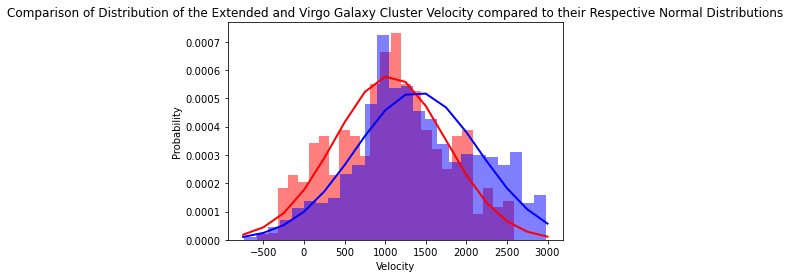

C:\Users\Hunter\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


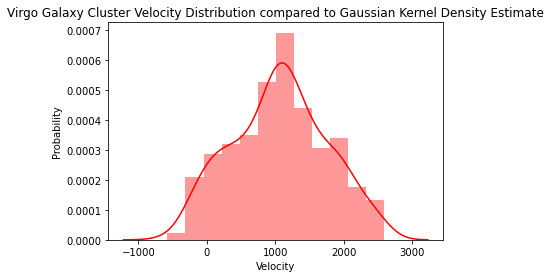

C:\Users\Hunter\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


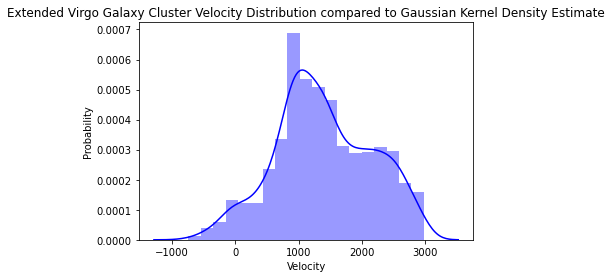

C:\Users\Hunter\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


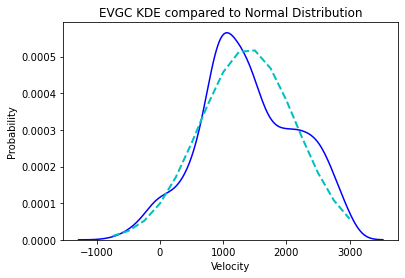

C:\Users\Hunter\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


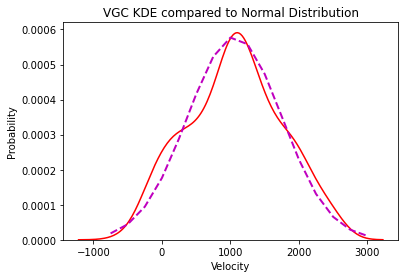

In [5]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import statistics as stats
from scipy.stats import norm
import seaborn as sns

mu = stats.mean(EVGCRed) 
mean = stats.mean(VGCRed)

sigma = np.std(EVGCRed) 
StDev = np.std(VGCRed)

Numtrial= len(EVGCRed)
points = len(VGCRed)

x_axis = np.arange(-750, 3250, 250)
v = norm.pdf(x_axis, mean, StDev)
e = norm.pdf(x_axis, mu, sigma)
  
#plt.plot(x_axis, norm.pdf(x_axis,0,2))
plt.plot(x_axis, v, 'r', linewidth=2)  
plt.plot(x_axis, e, 'b', linewidth=2)  

plt.hist(VGCRed,bins=25, color="red",alpha=0.5, density=True)
plt.hist(EVGCRed,bins=25, color="blue",alpha=0.5,density=True)


plt.ylabel('Probability')
plt.xlabel('Velocity')
plt.title('Comparison of Distribution of the Extended and Virgo Galaxy Cluster Velocity compared to their Respective Normal Distributions')
plt.show()

VGCPlot = sns.distplot(VGCRed,hist=True, kde=True,color="red")
plt.ylabel('Probability')
plt.xlabel('Velocity')
plt.title('Virgo Galaxy Cluster Velocity Distribution compared to Gaussian Kernel Density Estimate')
plt.show()

EVGCPlot = sns.distplot(EVGCRed,hist=True, kde=True,color="blue")
plt.ylabel('Probability')
plt.xlabel('Velocity')
plt.title('Extended Virgo Galaxy Cluster Velocity Distribution compared to Gaussian Kernel Density Estimate')
plt.show()

EVGCPlot = sns.distplot(EVGCRed,hist=False, kde=True,color="blue")
plt.plot(x_axis, e, 'c''--', linewidth=2)
plt.title('EVGC KDE compared to Normal Distribution')
plt.ylabel('Probability')
plt.xlabel('Velocity')
plt.show()

VGCPlot = sns.distplot(VGCRed,hist=False, kde=True,color="red")
plt.plot(x_axis, v,'m''--', linewidth=2) 
plt.title('VGC KDE compared to Normal Distribution')
plt.ylabel('Probability')
plt.xlabel('Velocity')
plt.show()
##Make figure of just lines compared

# Anderson Darling

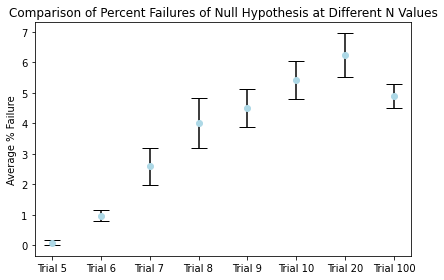

In [6]:
#Knowns
wins = 0 #Number of successful predictions of Gaussian Nature
mu = 0.0 #Mean
sigma = 500.0 #Standard Deviation
Numtrial=1000 #Number of Trials

#Callable List
statslist=[] #Statistics Value List
cvallist=[] #Critical Value List
w_list=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Average = [] #Average List
StandardDev = [] #Standard Deviation List
StandardError = [] #Standard Error List
n=[5,6,7,8,9,10,20,100]
#n=[5000,10000]

for i in n:
    w_list=[]
    
    for j in range (10):
        w=0
        wins=0

        for k in range (Numtrial) :
            data = np.random.normal(mu, sigma, i)

            #Anderson Darling Test
            AD=anderson(data, dist='norm')

            #Pulls the statistic Value outputted by Anderson Darling Test
            ST=AD[0]
            statistic= ST.tolist()
            #Pulls the critical Value outputted by Anderson Darling Test
            CV=AD[1]
            critical_value= CV.tolist()
        
            #Compiles a list of all Statistic and Critical Values for the number of trials 
            statslist += [statistic]
            cvallist += [critical_value]
        
            if statistic > critical_value[2]:#In Theory, if the statistic value is greater than the critical value at a particular significance value, then it is 100-(significance value) equals the confidence level.
                wins = wins + 1
        w=(wins/Numtrial)*100
    
        w_list +=[w]
        
    #Average
    Avg = sum(w_list) / len(w_list)
    Average += [Avg]
    
    #Standard Deviation
    Std=np.std(w_list)
    StandardDev += [Std]
    
    #Standard Error
    Ste=np.std(w_list)/math.sqrt(len(w_list))
    StandardError += [Ste]    

#Graph
labels = ['Trial 5','Trial 6','Trial 7','Trial 8','Trial 9','Trial 10','Trial 20','Trial 100']
x = np.arange(len(labels))
yerror=(StandardDev)
yerrorr=(StandardError)

# Build the plot
fig, ax = plt.subplots()
plt.errorbar(x, Average, yerr=yerror, fmt="o", ecolor="black", color="lightblue", capsize=8)
#plt.errorbar(x, Average, yerr=yerrorr, fmt=" ", ecolor="red", capsize=4)

ax.set_ylabel('Average % Failure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Percent Failures of Null Hypothesis at Different N Values')
ax.yaxis.grid(False)

# Show the figure
plt.tight_layout()
plt.show()

In [7]:
##VGC Velocity
AD=anderson(VGCRed, dist='norm')

#Pulls the statistic Value outputted by Anderson Darling Test
ST=AD[0]
statistic= ST.tolist()
#Pulls the critical Value outputted by Anderson Darling Test
CV=AD[1]
critical_value= CV.tolist()

if statistic < 2:
    
    if statistic > critical_value[3]:
        
        print("Anderson Darling Test successfully confirms the data is Gaussian")
    else:
        
        print("Anderson Darling Test has found this data to be non-gaussian")
else:
    print("Anderson Darling Test has found this data to be non-gaussian")

Anderson Darling Test has found this data to be non-gaussian
0.8228680856998949
0.908


In [8]:
##VGC Velocity Random Normal

statslist=[] #Statistics Value List
cvallist=[] #Critical Value List
w_list=[]

mu = stats.mean(VGCRed) #Mean
sigma = np.std(VGCRed) #Standard Deviation
Numtrial= 1000

VGCGauss=np.random.normal(mu, sigma, Numtrial)
AD=anderson(VGCGauss, dist='norm')

for j in range (10):
        w=0
        wins=0

        for k in range (Numtrial) :
                       
            data = np.random.normal(mu, sigma, 346)

            #Anderson Darling Test
            AD=anderson(data, dist='norm')

            #Pulls the statistic Value outputted by Anderson Darling Test
            ST=AD[0]
            statistic= ST.tolist()
            #Pulls the critical Value outputted by Anderson Darling Test
            CV=AD[1]
            critical_value= CV.tolist()
        
            #Compiles a list of all Statistic and Critical Values for the number of trials 
            statslist += [statistic]
            cvallist += [critical_value]
        
            if statistic > critical_value[2]:#In Theory, if the statistic value is greater than the critical value at a particular significance value, then it is 100-(significance value) equals the confidence level.
                wins = wins + 1
        w=(wins/Numtrial)*100
    
        w_list +=[w]
print("The percentage of runs that can reject the Null Hypothesis at 5% significance level is ",w,"%")

The percentage of runs that can reject the Null Hypothesis at 5% significance level is  4.2 %


In [9]:
##EVGC Velocity

AD=anderson(EVGCRed, dist='norm')

#Pulls the statistic Value outputted by Anderson Darling Test
ST=AD[0]
statistic= ST.tolist()
#Pulls the critical Value outputted by Anderson Darling Test
CV=AD[1]
critical_value= CV.tolist()
                
if statistic < 2:
    
    if statistic > critical_value[3]:
        
        print("Anderson Darling Test successfully confirms the data is Gaussian")
    else:
        
        print("Anderson Darling Test has found this data to be non-gaussian")
else:
    print("Anderson Darling Test has found this data to be non-gaussian")

Anderson Darling Test has found this data to be non-gaussian
5.379621543890607
1.089


In [10]:
##EVGC Velocity Random Normal

statslist=[] #Statistics Value List
cvallist=[] #Critical Value List
w_list=[]

mu = stats.mean(EVGCRed) #Mean
sigma = np.std(EVGCRed) #Standard Deviation
Numtrial= 1000

VGCGauss=np.random.normal(mu, sigma, Numtrial)
AD=anderson(VGCGauss, dist='norm')

for j in range (10):
        w=0
        wins=0

        for k in range (Numtrial) :
            
            data = np.random.normal(mu, sigma, 1324)

            #Anderson Darling Test
            AD=anderson(data, dist='norm')

            #Pulls the statistic Value outputted by Anderson Darling Test
            ST=AD[0]
            statistic= ST.tolist()
            #Pulls the critical Value outputted by Anderson Darling Test
            CV=AD[1]
            critical_value= CV.tolist()
        
            #Compiles a list of all Statistic and Critical Values for the number of trials 
            statslist += [statistic]
            cvallist += [critical_value]
        
            if statistic > critical_value[2]:#In Theory, if the statistic value is greater than the critical value at a particular significance value, then it is 100-(significance value) equals the confidence level.
                wins = wins + 1
        w=(wins/Numtrial)*100
    
        w_list +=[w]
print("The percentage of runs that can reject the Null Hypothesis at 5% significance level is ",w,"%")

The percentage of runs that can reject the Null Hypothesis at 5% significance level is  3.5999999999999996 %


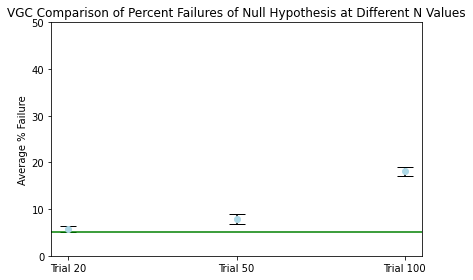

In [25]:
#Knowns
wins = 0 #Number of successful predictions of Gaussian Nature
mu = stats.mean(VGCRed) #Mean
sigma = np.std(VGCRed) #Standard Deviation
Numtrial=1000 #Number of Trials

#Callable List
statslist=[] #Statistics Value List
cvallist=[] #Critical Value List
w_list=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Average = [] #Average List
StandardDev = [] #Standard Deviation List
StandardError = [] #Standard Error List
n=[20,50,100]

for i in n:
    w_list=[]
    
    for j in range (10):
        w=0
        wins=0

        for k in range (Numtrial) :
                
            data = random.choices(VGCRed, k=i)

            #Anderson Darling Test
            AD=anderson(data, dist='norm')

            #Pulls the statistic Value outputted by Anderson Darling Test
            ST=AD[0]
            statistic= ST.tolist()
            #Pulls the critical Value outputted by Anderson Darling Test
            CV=AD[1]
            critical_value= CV.tolist()
        
            #Compiles a list of all Statistic and Critical Values for the number of trials 
            statslist += [statistic]
            cvallist += [critical_value]
        
            if statistic > critical_value[2]:#In Theory, if the statistic value is greater than the critical value at a particular significance value, then it is 100-(significance value) equals the confidence level.
                wins = wins + 1
        w=(wins/Numtrial)*100
    
        w_list +=[w]
        
    #Average
    Avg = sum(w_list) / len(w_list)
    Average += [Avg]
    
    #Standard Deviation
    Std=np.std(w_list)
    StandardDev += [Std]
    
    #Standard Error
    Ste=np.std(w_list)/math.sqrt(len(w_list))
    StandardError += [Ste]    

#Graph
labels = ['Trial 20','Trial 50','Trial 100']
x = np.arange(len(labels))
yerror=(StandardDev)
yerrorr=(StandardError)

# Build the plot
fig, ax = plt.subplots()
plt.errorbar(x, Average, yerr=yerror, fmt="o", ecolor="black", color="lightblue", capsize=8)
plt.axhline(y=5, color='g', linestyle='-')

ax = plt.gca()
ax.set_ylim([0, 50])

ax.set_ylabel('Average % Failure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('VGC Comparison of Percent Failures of Null Hypothesis at Different N Values')
ax.yaxis.grid(False)

# Show the figure
plt.tight_layout()
plt.show()

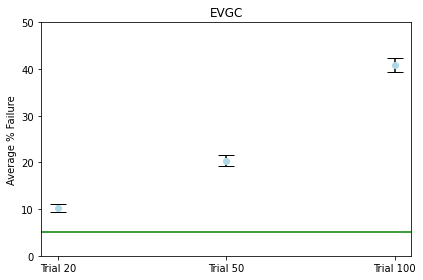

In [12]:
#Knowns
wins = 0 #Number of successful predictions of Gaussian Nature
mu = stats.mean(EVGCRed) #Mean
sigma = np.std(EVGCRed) #Standard Deviation
Numtrial=1000 #Number of Trials

#Callable List
statslist=[] #Statistics Value List
cvallist=[] #Critical Value List
w_list=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Average = [] #Average List
StandardDev = [] #Standard Deviation List
StandardError = [] #Standard Error List
n=[20,50,100]

for i in n:
    w_list=[]
    
    for j in range (10):
        w=0
        wins=0

        for k in range (Numtrial) :
            
        
            
            data = random.choices(EVGCRed, k=i)

            #Anderson Darling Test
            AD=anderson(data, dist='norm')

            #Pulls the statistic Value outputted by Anderson Darling Test
            ST=AD[0]
            statistic= ST.tolist()
            #Pulls the critical Value outputted by Anderson Darling Test
            CV=AD[1]
            critical_value= CV.tolist()
        
            #Compiles a list of all Statistic and Critical Values for the number of trials 
            statslist += [statistic]
            cvallist += [critical_value]
        
            if statistic > critical_value[2]:#In Theory, if the statistic value is greater than the critical value at a particular significance value, then it is 100-(significance value) equals the confidence level.
                wins = wins + 1
        w=(wins/Numtrial)*100
    
        w_list +=[w]
        
    #Average
    Avg = sum(w_list) / len(w_list)
    Average += [Avg]
    
    #Standard Deviation
    Std=np.std(w_list)
    StandardDev += [Std]
    
    #Standard Error
    Ste=np.std(w_list)/math.sqrt(len(w_list))
    StandardError += [Ste]    

#Graph
labels = ['Trial 20','Trial 50','Trial 100']
x = np.arange(len(labels))
yerror=(StandardDev)
yerrorr=(StandardError)

# Build the plot
fig, ax = plt.subplots()
plt.errorbar(x, Average, yerr=yerror, fmt="o", ecolor="black", color="lightblue", capsize=8)
plt.axhline(y=5, color='g', linestyle='-')

ax = plt.gca()

ax.set_ylim([0, 50])

ax.set_ylabel('Average % Failure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('EVGC Comparison of Percent Failures of Null Hypothesis at Different N Values')
ax.yaxis.grid(False)

# Show the figure 
plt.tight_layout()
plt.show()

# Hellinger Distance

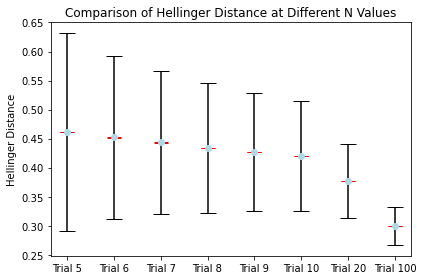

In [13]:
#Knowns
mu = 1225 #Mean
sigma = 725 #Standard Deviation
Numtrial=10000 #Number of Trials
SquareRT2 = np.sqrt(2)

#Hellinger Equation
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / SquareRT2

#Callable List
wlist=[] 
Averagelist = [] #Average List
StandardDevlist = [] #Standard Deviation List
StandardErrorlist = [] #Standard Error List
n=[5,6,7,8,9,10,20,100]

for i in n:
    wlist=[]

    for j in range (10):
        HellingerDist=0
        
        for j in range (Numtrial) :
             
            #Hellinger distance requires two datasets of probabilities, of equal length, and that all data points be positive to funtion properly.       
            a = np.random.normal(mu, sigma, i)
            ab = a / a.sum()  #Turns all data points into probabilities
            p = ab - min(ab)  #Makes sure that all values are positive
            
            b = np.random.normal(mu, sigma, i)
            ba = b / b.sum() 
            q = ba - min(ba)
            
            HellingerDist=(hellinger(p, q)) #Runs the Hellinger Distance Equation on the two probability data sets
    
            wlist += [HellingerDist]
        
    #Average
    Avg = sum(wlist) / len(wlist)
    Averagelist += [Avg]
    
    #Standard Deviation
    Std=np.std(wlist)
    StandardDevlist += [Std]
    
    #Standard Error
    Ste=np.std(wlist)/math.sqrt(len(wlist))
    StandardErrorlist += [Ste]    
    
#Graph
labels = ['Trial 5','Trial 6','Trial 7','Trial 8','Trial 9','Trial 10','Trial 20','Trial 100']
x = np.arange(len(labels))
yerror=(StandardDevlist)
yerrorr=(StandardErrorlist)

# Build the plot
fig, ax = plt.subplots()
plt.errorbar(x, Averagelist, yerr=yerror, fmt="o", ecolor="black", color="lightblue", capsize=8)
plt.errorbar(x, Averagelist, yerr=yerrorr, fmt=" ", ecolor="red", capsize=7)

ax.set_ylabel('Hellinger Distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Hellinger Distance at Different N Values')
ax.yaxis.grid(False)

# Sow the figure
plt.tight_layout()
plt.show()


In [15]:
#Empty List
AverageGC = [] #Average List
StandardDevGC = [] #Standard Deviation List
StandardErrorGC = [] #Standard Error List

In [16]:
##Perfect Gaussian VGC Hellinger Distance

#Knowns
mu = stats.mean(VGCRed) #Mean
sigma = np.std(VGCRed) #Standard Deviation
Numtrial= len(VGCRed) 
SquareRT2 = np.sqrt(2)
Helllist=[]
#Hellinger Equation
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / SquareRT2

#Callable List
wlist=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Averagelist = [] #Average List
StandardDevlist = [] #Standard Deviation List
StandardErrorlist = [] #Standard Error List
for i in range (10000):
    
    #Hellinger distance requires two datasets of probabilities, of equal length, and that all data points be positive to funtion properly.       
    a = np.random.normal(mu, sigma, Numtrial)
    ab = a / a.sum()  #Turns all data points into probabilities
    p = ab - min(ab)  #Makes sure that all values are positive
            
    b = np.random.normal(mu, sigma, Numtrial)
    ba = b / b.sum() 
    q = ba - min(ba)
            

    HellingerDist=(hellinger(p, q))
    Helllist+=[HellingerDist]
    
AverageEVGC=stats.mean(Helllist)
AverageGC+=[AverageEVGC]

StdEVGC=np.std(Helllist)
StandardDevGC += [StdEVGC]

SteEVGC=np.std(Helllist)/math.sqrt(len(Helllist))
StandardErrorGC += [SteEVGC]

In [17]:
##VGC Hellinger Distance

#Knowns
mu = stats.mean(VGCRed) #Mean
sigma = np.std(VGCRed) #Standard Deviation
Numtrial= len(VGCRed) 
SquareRT2 = np.sqrt(2)
Helllist=[]
#Hellinger Equation
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / SquareRT2

#Callable List
wlist=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Averagelist = [] #Average List
StandardDevlist = [] #Standard Deviation List
StandardErrorlist = [] #Standard Error List
for i in range (10000):
    
    #Hellinger distance requires two datasets of probabilities, of equal length, and that all data points be positive to funtion properly.       
    a = np.random.normal(mu, sigma, Numtrial)
    ab = a / a.sum()  #Turns all data points into probabilities
    p = ab - min(ab)  #Makes sure that all values are positive
            
    b = VGCRed
    ba = b / b.sum() 
    q = ba - min(ba)
    
    HellingerDist=(hellinger(p, q))
    Helllist+=[HellingerDist]
    
AverageEVGC=stats.mean(Helllist)
AverageGC+=[AverageEVGC]

StdEVGC=np.std(Helllist)
StandardDevGC += [StdEVGC]

SteEVGC=np.std(Helllist)/math.sqrt(len(Helllist))
StandardErrorGC += [SteEVGC]


In [18]:
##Perfect Gaussian EVGC Hellinger Distance

#Knowns
mu = stats.mean(EVGCRed) #Mean
sigma = np.std(EVGCRed) #Standard Deviation
Numtrial= len(EVGCRed) 
SquareRT2 = np.sqrt(2)
Helllist=[]
#Hellinger Equation
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / SquareRT2

#Callable List
wlist=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Averagelist = [] #Average List
StandardDevlist = [] #Standard Deviation List
StandardErrorlist = [] #Standard Error List
for i in range (10000):
    
    #Hellinger distance requires two datasets of probabilities, of equal length, and that all data points be positive to funtion properly.       
    a = np.random.normal(mu, sigma, Numtrial)
    ab = a / a.sum()  #Turns all data points into probabilities
    p = ab - min(ab)  #Makes sure that all values are positive
            
    b = np.random.normal(mu, sigma, Numtrial)
    ba = b / b.sum() 
    q = ba - min(ba)
            

    HellingerDist=(hellinger(p, q))
    Helllist+=[HellingerDist]
    
AverageEVGC=stats.mean(Helllist)
AverageGC+=[AverageEVGC]

StdEVGC=np.std(Helllist)
StandardDevGC += [StdEVGC]

SteEVGC=np.std(Helllist)/math.sqrt(len(Helllist))
StandardErrorGC += [SteEVGC]

In [19]:
##EVGC Hellinger Distance

#Knowns
mu = stats.mean(EVGCRed) #Mean
sigma = np.std(EVGCRed) #Standard Deviation
Numtrial= len(EVGCRed) 
SquareRT2 = np.sqrt(2)
Helllist=[]
#Hellinger Equation
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / SquareRT2

#Callable List
wlist=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Averagelist = [] #Average List
StandardDevlist = [] #Standard Deviation List
StandardErrorlist = [] #Standard Error List
for i in range (10000):
    
    #Hellinger distance requires two datasets of probabilities, of equal length, and that all data points be positive to funtion properly.       
    a = np.random.normal(mu, sigma, Numtrial)
    ab = a / a.sum()  #Turns all data points into probabilities
    p = ab - min(ab)  #Makes sure that all values are positive
            
    b = EVGCRed
    ba = b / b.sum() 
    q = ba - min(ba)
            
    HellingerDist=(hellinger(p, q))
    #print(HellingerDist)
    Helllist+=[HellingerDist]
    
AverageEVGC=stats.mean(Helllist)
AverageGC+=[AverageEVGC]

StdEVGC=np.std(Helllist)
StandardDevGC += [StdEVGC]

SteEVGC=np.std(Helllist)/math.sqrt(len(Helllist))
StandardErrorGC += [SteEVGC]


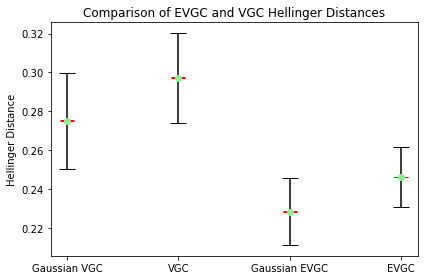

In [21]:
#Graph
labels = ['Gaussian VGC','VGC','Gaussian EVGC','EVGC']
x = np.arange(len(labels))
yerror=(StandardDevGC)
yerrorr=(StandardErrorGC)

# Build the plot
fig, ax = plt.subplots()
plt.errorbar(x, AverageGC, yerr=yerror, fmt="o", ecolor="black", color="lightgreen", capsize=8)
plt.errorbar(x, AverageGC, yerr=yerrorr, fmt=" ", ecolor="red", capsize=7)

ax.set_ylabel('Hellinger Distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Comparison of EVGC and VGC Hellinger Distances')
ax.yaxis.grid(False)

# Show the figure
plt.tight_layout()
plt.show()


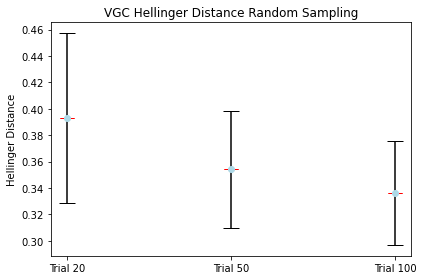

In [22]:
##VGC Random Sample

#Knowns
mu = stats.mean(VGCRed) #Mean
sigma = np.std(VGCRed) #Standard Deviation
Numtrial= 10000
SquareRT2 = np.sqrt(2)

#Hellinger Equation
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / SquareRT2

#Callable List
wlist=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Averagelist = [] #Average List
StandardDevlist = [] #Standard Deviation List
StandardErrorlist = [] #Standard Error List
n=[20,50,100]

for i in n:
    wlist=[]

    for j in range (10):
        HellingerDist=0
        
        for j in range (Numtrial) :
             
            #Hellinger distance requires two datasets of probabilities, of equal length, and that all data points be positive to funtion properly.       
            a = np.random.normal(mu, sigma, i)
            ab = a / a.sum()  #Turns all data points into probabilities
            p = ab - min(ab)  #Makes sure that all values are positive
            
            b = (random.choices(VGCRed, k=i))
            ba = b / sum(b) 
            q = ba - min(ba)
        
            HellingerDist=(hellinger(p, q)) #Runs the Hellinger Distance Equation on the two probability data sets
    
            wlist += [HellingerDist]
        
    #Average
    Avg = sum(wlist) / len(wlist)
    Averagelist += [Avg]
    
    #Standard Deviation
    Std=np.std(wlist)
    StandardDevlist += [Std]
    
    #Standard Error
    Ste=np.std(wlist)/math.sqrt(len(wlist))
    StandardErrorlist += [Ste]    
    
#Graph
labels = ['Trial 20','Trial 50','Trial 100']
x = np.arange(len(labels))
yerror=(StandardDevlist)
yerrorr=(StandardErrorlist)

# Build the plot
fig, ax = plt.subplots()
plt.errorbar(x, Averagelist, yerr=yerror, fmt="o", ecolor="black", color="lightblue", capsize=8)
plt.errorbar(x, Averagelist, yerr=yerrorr, fmt=" ", ecolor="red", capsize=7)

ax.set_ylabel('Hellinger Distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('VGC Hellinger Distance Random Sampling')
ax.yaxis.grid(False)

# Show the figure
plt.tight_layout()
plt.show()

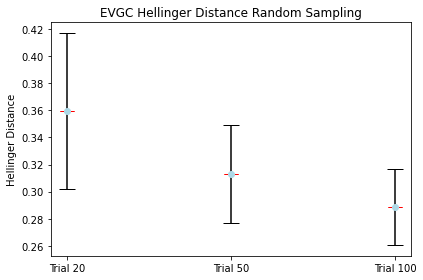

In [24]:
##VGC Random Sample

#Knowns
mu = stats.mean(EVGCRed) #Mean
sigma = np.std(EVGCRed) #Standard Deviation
Numtrial= 10000
SquareRT2 = np.sqrt(2)

#Hellinger Equation
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / SquareRT2

#Callable List
wlist=[] #List for compiling outputs of runs that predict at a 95% efficiency that the data set is Gaussian
Averagelist = [] #Average List
StandardDevlist = [] #Standard Deviation List
StandardErrorlist = [] #Standard Error List
n=[20,50,100]

for i in n:
    wlist=[]

    for j in range (10):
        HellingerDist=0
        
        for j in range (Numtrial) :
             
            #Hellinger distance requires two datasets of probabilities, of equal length, and that all data points be positive to funtion properly.       
            a = np.random.normal(mu, sigma, i)
            ab = a / a.sum()  #Turns all data points into probabilities
            p = ab - min(ab)  #Makes sure that all values are positive
            
            b = (random.choices(EVGCRed, k=i))
            ba = b / sum(b) 
            q = ba - min(ba)
            
            HellingerDist=(hellinger(p, q)) #Runs the Hellinger Distance Equation on the two probability data sets
    
            wlist += [HellingerDist]
        
    #Average
    Avg = sum(wlist) / len(wlist)
    Averagelist += [Avg]
    
    #Standard Deviation
    Std=np.std(wlist)
    StandardDevlist += [Std]
    
    #Standard Error
    Ste=np.std(wlist)/math.sqrt(len(wlist))
    StandardErrorlist += [Ste]    
    
#Graph
labels = ['Trial 20','Trial 50','Trial 100']
x = np.arange(len(labels))
yerror=(StandardDevlist)
yerrorr=(StandardErrorlist)

# Build the plot
fig, ax = plt.subplots()
plt.errorbar(x, Averagelist, yerr=yerror, fmt="o", ecolor="black", color="lightblue", capsize=8)
plt.errorbar(x, Averagelist, yerr=yerrorr, fmt=" ", ecolor="red", capsize=7)

ax.set_ylabel('Hellinger Distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('EVGC Hellinger Distance Random Sampling')
ax.yaxis.grid(False)

# Show the figure
plt.tight_layout()
plt.show()